<ipython-input-1-1e71e8ed073d>:17: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  F_k += (lambda_poisson**k * np.exp(-lambda_poisson)) / np.math.factorial(k)


Demanda diaria simulada: [1, 6, 7, 3, 6, 4, 10, 6, 6, 4, 7, 4, 8, 3, 3, 4, 5, 3, 4, 6, 4, 4, 1, 8, 2, 8, 4, 7, 2, 0, 5, 5, 2, 5, 3, 3, 6, 4, 4, 10, 5, 5, 6, 5, 3, 6, 8, 8, 6, 6, 5, 4, 8, 12, 2, 7, 6, 6, 4, 4, 7, 7, 4, 4, 1, 10, 6, 7, 2, 7, 4, 5, 2, 4, 3, 7, 5, 7, 7, 4, 3, 5, 8, 7, 3, 3, 3, 2, 5, 6, 6, 2, 6, 5, 8, 2, 5, 11, 7, 1]


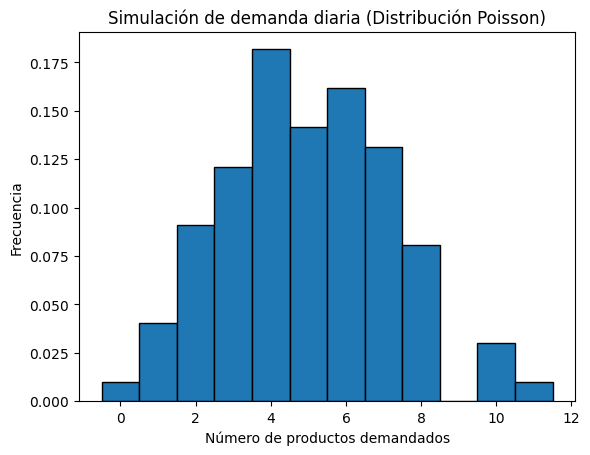

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro de la distribución Poisson (media de la demanda diaria)
lambda_poisson = 5  # Por ejemplo, 5 teléfonos móviles por día

# Generar una variable aleatoria uniforme U ~ Uniform(0, 1)
n = 100  # Número de simulaciones
U = np.random.uniform(0, 1, n)

# Aplicar la transformada inversa para la distribución Poisson
def poisson_inverse_transform(lambda_poisson, U):
    k = 0
    F_k = np.exp(-lambda_poisson)  # Primera probabilidad acumulada (k=0)
    while U > F_k:
        k += 1
        F_k += (lambda_poisson**k * np.exp(-lambda_poisson)) / np.math.factorial(k)
    return k

# Generar demanda simulada usando transformada inversa
demanda_simulada = [poisson_inverse_transform(lambda_poisson, u) for u in U]

# Mostrar los resultados
print("Demanda diaria simulada:", demanda_simulada)

# Graficar histograma de la demanda simulada
plt.hist(demanda_simulada, bins=np.arange(0, max(demanda_simulada) + 1) - 0.5, edgecolor='black', density=True)
plt.title("Simulación de demanda diaria (Distribución Poisson)")
plt.xlabel("Número de productos demandados")
plt.ylabel("Frecuencia")
plt.show()